In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
import pyedflib
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
import pickle

In [2]:
DATA_PATH = Path('/Volumes/Ultra Touch/Data/mice_cholinesterase/physostigmine')
SEG_PATH = Path('/Volumes/Ultra Touch/MOUSE/mouse_list.csv')

SAMPFREQ = 2000
DOWN_SAMPFREQ = 250
PROMINENCE = 0.03
WLEN = 2
MIN_CYCLE = 0.1
MAX_CYCLE = 0.3 
TRAINING_SIZE = 30 
INTERVAL = 60 
N_IN_CLUSTER = 5
N_OUT_CLUSTER = 5 
IN_D = 0.2
OUT_D =0.2
N_ITER = 10
MAX_WARPING = 0.06
QUNATILE = 0.95
NJOBS =1
VERBOSE= True

In [3]:
fct = lambda x: (np.array([int(t) for t in x.split(':')]) @ np.array([3600,60,1]).reshape(-1,1))[0]*SAMPFREQ

In [4]:
df = pd.read_csv(SEG_PATH, delimiter=';',index_col=0).reset_index(drop=True)
df = df.dropna()
df['before_start'] =  df['before_start'].apply(fct)
df['before_end'] =  df['before_end'].apply(fct)
df['after_start'] =  df['after_start'].apply(fct)
df['after_end'] =  df['after_end'].apply(fct)
df.head()

,filename,genotype,before_start,before_end,after_start,after_end,arret
1,"20170519_prima#12_physo0,33_i5_e60_ep30.EDF",prima,30000,2396000,2588000,6016000,fin
3,"20170328_prima#85_physo0,33_i5_e60_ep30.EDF",prima,10000,1796000,2016000,6004000,fin
5,"20170328_colq1#49_physo0,33_i5_e60_ep30.EDF",colq,10000,2396000,2556000,6008000,fin
7,20170324_del1#11_physo_i5_e60_ep30.EDF,del1,30000,2396000,2584000,6008000,fin
9,20170324_prima#4_physo_i5_e60_ep30.EDF,prima,10000,1794000,2016000,6008000,fin


In [5]:
def get_data(path): 
    f = pyedflib.EdfReader(str(path))
    sig = -f.readSignal(1)
    return sig.astype('float')

In [6]:
lst = []
for line in df.values[:2]:
    data = get_data(DATA_PATH/line[0])
    data1 = data[line[4]:line[5]]
    lst.append(data1)
    data2= data[line[2]:line[3]]
    lst.append(data2)


arr = np.array(lst,dtype=object)


In [7]:
for i,ts in enumerate(arr): 
    np.savetxt(f'/Users/tgermain/Documents/test_dataset/{i}.txt',ts.reshape(-1),delimiter=',')

In [8]:
from tools.pipeline import Pipeline
pipe = Pipeline(SAMPFREQ,PROMINENCE,WLEN,MIN_CYCLE,MAX_CYCLE,TRAINING_SIZE,INTERVAL,N_IN_CLUSTER,IN_D,N_OUT_CLUSTER,OUT_D,DOWN_SAMPFREQ,MAX_WARPING,N_ITER,QUNATILE,NJOBS,VERBOSE)
pipe.fit(arr)

 ### Inhalation ###
Iteration : 1/10 -- Inertia: 5.063521318082425
Iteration : 2/10 -- Inertia: 2.6032097613231473
Iteration : 3/10 -- Inertia: 1.9506877185209566
Iteration : 4/10 -- Inertia: 1.6648414153813245
Iteration : 5/10 -- Inertia: 1.5238081580123313
Iteration : 6/10 -- Inertia: 1.4776148463576948
Iteration : 7/10 -- Inertia: 1.4415300973265974
Iteration : 8/10 -- Inertia: 1.4483762706441763
Iteration : 9/10 -- Inertia: 1.3878192198632826
Iteration : 10/10 -- Inertia: 1.3886541634141305

 ### Exhalation ###
Iteration : 1/10 -- Inertia: 11.308392055274023
Iteration : 2/10 -- Inertia: 3.6150604865653646
Iteration : 3/10 -- Inertia: 2.7562203940333916
Iteration : 4/10 -- Inertia: 2.439599965191061
Iteration : 5/10 -- Inertia: 2.3709570054998657
Iteration : 6/10 -- Inertia: 2.378574431582162
Iteration : 7/10 -- Inertia: 2.2970798282288385
Iteration : 8/10 -- Inertia: 2.3166962877905086
Iteration : 9/10 -- Inertia: 2.308381819241773
Iteration : 10/10 -- Inertia: 2.2753459744589875


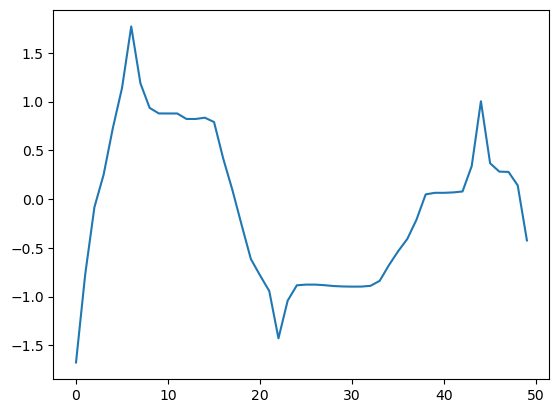

In [9]:
plt.plot(pipe.in_kdtw_.centroid_[4])

In [10]:
pipe.plot_intertia()

In [11]:
pipe.plot_medoid()

In [12]:
a = pickle.dumps(pipe)

In [13]:
b = pickle.loads(a)

In [14]:
b.in_kdtw_.centroid_

array([[[-2.32248629e+00],
        [-1.85167433e+00],
        [-1.81113840e+00],
        [-1.81113840e+00],
        [-1.79107932e+00],
        [-1.40529536e+00],
        [-1.15462650e+00],
        [-7.68255243e-01],
        [-7.42591216e-01],
        [-7.42591216e-01],
        [-7.42591216e-01],
        [-7.42591216e-01],
        [-6.90283562e-01],
        [-2.81436006e-01],
        [-1.92674519e-01],
        [-1.08164604e-01],
        [ 1.36746884e-01],
        [ 3.48547945e-01],
        [ 4.06703486e-01],
        [ 4.07318395e-01],
        [ 4.05846496e-01],
        [ 4.06226497e-01],
        [ 4.45964893e-01],
        [ 6.07642039e-01],
        [ 6.46759996e-01],
        [ 6.46420907e-01],
        [ 6.46292139e-01],
        [ 6.45296280e-01],
        [ 6.62982563e-01],
        [ 7.50631234e-01],
        [ 8.49609630e-01],
        [ 8.80112115e-01],
        [ 8.79456573e-01],
        [ 8.76905585e-01],
        [ 8.76905146e-01],
        [ 8.76905146e-01],
        [ 8.76905121e-01],
 